<a href="https://colab.research.google.com/github/Panagiotis-Bosinas/Machine_Learning_Assignments/blob/main/Ergasia_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

# Ερωτήματα

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

## Ερώτημα 1

Load data into dataframe

In [67]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


Describe the data

In [68]:
df.describe().round(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.00,3276.00,3276.00,3276.00,2495.00,3276.00,3276.00,3114.00,3276.00,3276.00
mean,7.08,196.37,22014.09,7.12,333.78,426.21,14.28,66.40,3.97,0.39
std,1.59,32.88,8768.57,1.58,41.42,80.82,3.31,16.18,0.78,0.49
min,0.00,47.43,320.94,0.35,129.00,181.48,2.20,0.74,1.45,0.00
25%,6.09,176.85,15666.69,6.13,307.70,365.73,12.07,55.84,3.44,0.00
50%,7.04,196.97,20927.83,7.13,333.07,421.88,14.22,66.62,3.96,0.00
75%,8.06,216.67,27332.76,8.11,359.95,481.79,16.56,77.34,4.50,1.00
max,14.00,323.12,61227.20,13.13,481.03,753.34,28.30,124.00,6.74,1.00


Plot histograms for each variable and bar chart for the Potability

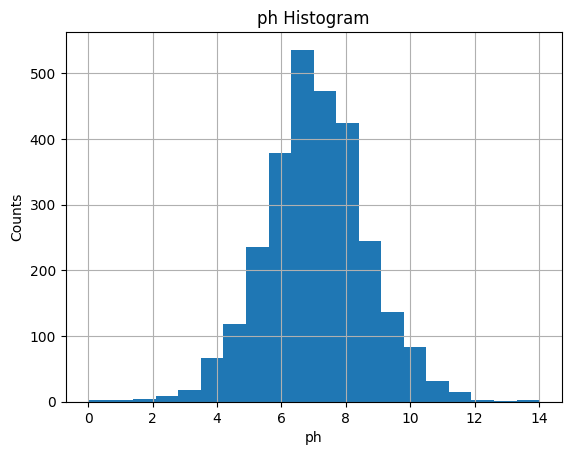

In [69]:
df['ph'].hist(bins=20)
plt.title('ph Histogram')
plt.xlabel('ph')
plt.ylabel('Counts')
plt.show()

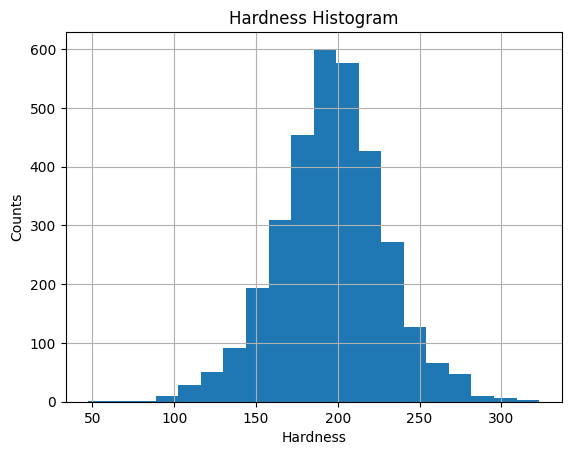

In [70]:
df['Hardness'].hist(bins=20)
plt.title('Hardness Histogram')
plt.xlabel('Hardness')
plt.ylabel('Counts')
plt.show()

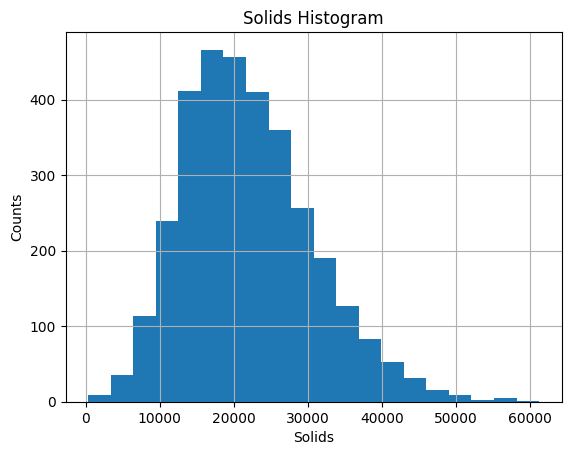

In [71]:
df['Solids'].hist(bins=20)
plt.title('Solids Histogram')
plt.xlabel('Solids')
plt.ylabel('Counts')
plt.show()

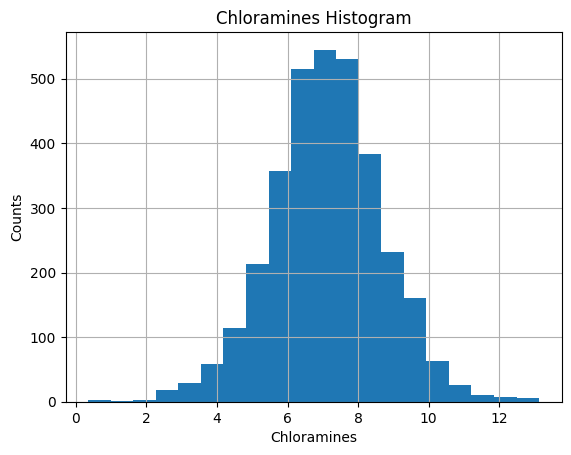

In [72]:
df['Chloramines'].hist(bins=20)
plt.title('Chloramines Histogram')
plt.xlabel('Chloramines')
plt.ylabel('Counts')
plt.show()

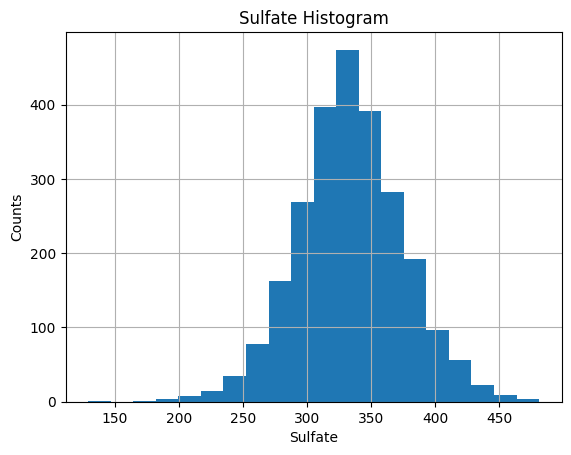

In [73]:
df['Sulfate'].hist(bins=20)
plt.title('Sulfate Histogram')
plt.xlabel('Sulfate')
plt.ylabel('Counts')
plt.show()

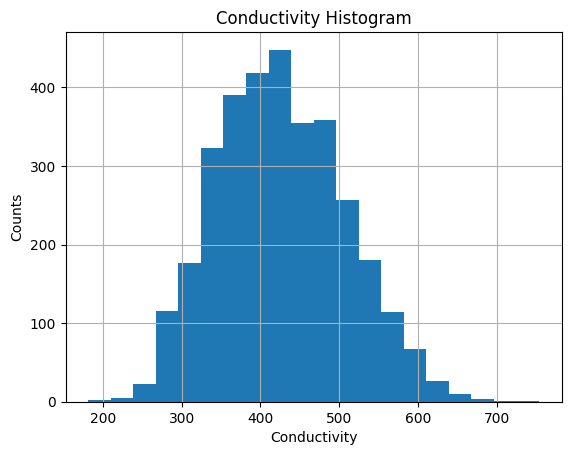

In [74]:
df['Conductivity'].hist(bins=20)
plt.title('Conductivity Histogram')
plt.xlabel('Conductivity')
plt.ylabel('Counts')
plt.show()

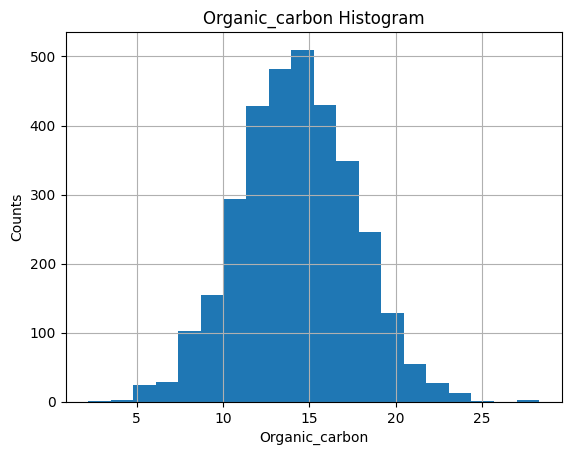

In [75]:
df['Organic_carbon'].hist(bins=20)
plt.title('Organic_carbon Histogram')
plt.xlabel('Organic_carbon')
plt.ylabel('Counts')
plt.show()

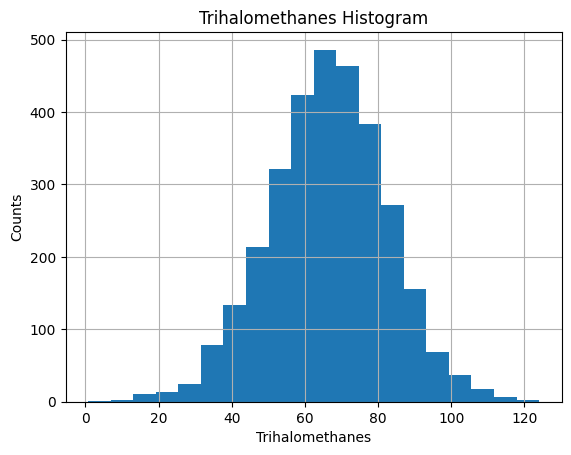

In [76]:
df['Trihalomethanes'].hist(bins=20)
plt.title('Trihalomethanes Histogram')
plt.xlabel('Trihalomethanes')
plt.ylabel('Counts')
plt.show()

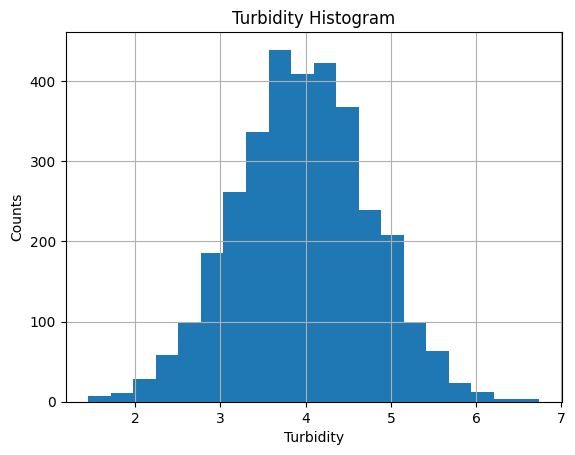

In [77]:
df['Turbidity'].hist(bins=20)
plt.title('Turbidity Histogram')
plt.xlabel('Turbidity')
plt.ylabel('Counts')
plt.show()

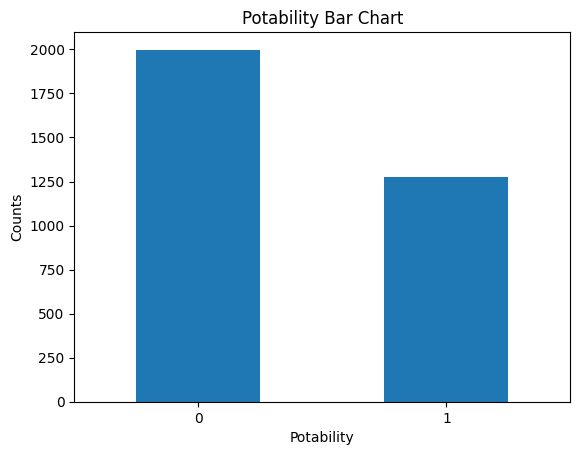

In [78]:
df['Potability'].value_counts().plot(kind='bar',rot=0)
plt.title('Potability Bar Chart')
plt.xlabel('Potability')
plt.ylabel('Counts')
plt.show()

Από το αποτέλεσμα της εντολής describe(), η σειρά 'Count' μας φανερώνει το πλήθος των κενών τιμών για κάθε μεταβλητή. Από το pH υπολείπονται 3276-2785=491 τιμές. Αντίστοιχα βλέπουμε ότι από το Sulfate υπολείπονται 781 τιμές και από το Trihalomethanes 162 τιμές, ενώ οι υπόλοιπες στήλες φαίνεται να είναι πλήρεις. Το ποσοστό του πόσιμου νερού φανερώνεται από τον μέσο όρο της τιμής του Potability, αφού είναι δυαδική μεταβλητή. Επομένως, το 39% των περιπτώσεων αναφέρεται σε πόσιμο νερό, ενώ το 61% σε μη πόσιμο νερό.

Η ποιότητα των δεδομένων είναι καλή για την εφαρμογή μας, αφού όλες οι μεταβλητές (εκτός ίσως από τα Solids) εμφανίζουν κανονική κατανομή. Εκτός από το ότι καθιστά τα δεδομένα αντιπροσωπευτικά, το γεγονός αυτό μας επιτρέπει να συμπληρώσουμε τις κενές τιμές με τον μέσο όρο των υπόλοιπων τιμών χωρίς βλάβη της αξιοπιστίας των δεδομένων. Ακόμη, εμπεριέχονται στα δεδομένα πολλά διαφορετικά χαρακτηριστικά που επηρεάζουν την καταλληλότητα του νερού, επομένως το μοντέλο θα μπορεί να κρίνει με καλή ακρίνεια την ποιότητα του νερού.

## Ερώτημα 2

Επιλέγουμε τις τιμές του Potability που ανήκουν στην εκάστοτε περιοχή του pH και βρίσκουμε τον μέσο όρο, που εκφράζει το ποσοστό του πόσιμου νερού.

In [79]:
ph_low = df[df['ph'] < 6.5]['Potability']
ph_low_potable = ph_low.mean()*100

ph_ideal = df[(df['ph'] >= 6.5) & (df['ph'] <= 8.5)]['Potability']
ph_ideal_potable = ph_ideal.mean()*100

ph_high = df[df['ph'] > 8.5]['Potability']
ph_high_potable = ph_high.mean()*100

print(f"The percentage of potable water for pH below 6.5 is: {ph_low_potable:.2f}%")
print(f"The percentage of potable water for pH from 6.5 to 8.5 is: {ph_ideal_potable:.2f}%")
print(f"The percentage of potable water for pH above 8.5 is: {ph_high_potable:.2f}%")

The percentage of potable water for pH below 6.5 is: 36.78%
The percentage of potable water for pH from 6.5 to 8.5 is: 43.90%
The percentage of potable water for pH above 8.5 is: 33.13%


Τα δεδομένα συνάδουν με την οδηγία του Π.Ο.Υ, αφού πράγματι φαίνεται ότι το ποσοστό του πόσιμου νερού στα δείγματα που βρίσκονται εντός των αποδεκτών ορίων είναι υψηλότερο.

## Ερώτημα 3

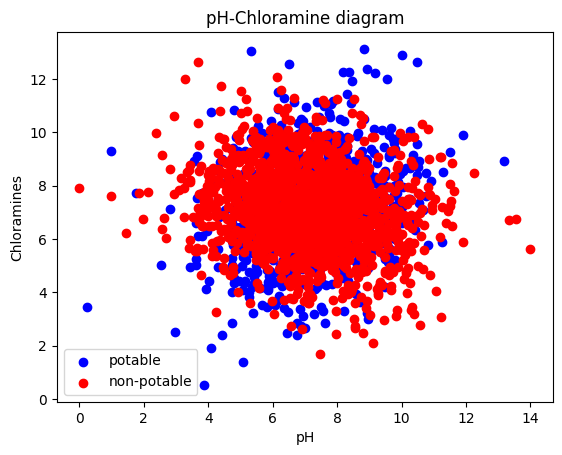

In [80]:
ph_potable = df[df['Potability']==1]['ph']
chloramine_potable = df[df['Potability']==1]['Chloramines']
ph_non_potable = df[df['Potability']==0]['ph']
chloramine_non_potable = df[df['Potability']==0]['Chloramines']

plt.scatter(ph_potable, chloramine_potable, color='blue', label='potable')
plt.scatter(ph_non_potable, chloramine_non_potable, color='red', label='non-potable')
plt.xlabel('pH')
plt.ylabel('Chloramines')
plt.title('pH-Chloramine diagram')
plt.legend()
plt.show()

Είναι εμφανές ότι η διαχωρισιμότητα των δεδομένων με δείκτη αυτές τις δύο μεταβλητές είναι πολύ κακή, αφού δεν παρουσιάζεται ουσιαστιική διαφορά στα δεδομένα, ειδικά όσον αφορά τις χλωραμίνες. Επιπλέον, με γνώση ότι τα προτεινόμενα επίπεδα των χλωραμινών είναι μέχρι 4ppm, μπορούμε να πούμε ότι η πλειοψηφία των δειγμάτων βρίσκεται πολύ πάνω του ορίου άσχετα από το αν το νερό είναι πόσιμο ή όχι. Το γεγονός αυτό ίσως να φανερώνει ότι τα δεδομένα τελικά αποκλείνουν λίγο από την πραγματικότητα. Από την άλλη, μπορεί απλά να σημαίνει ότι τα επίπεδα της χλωραμίνης δεν είναι καθοριστικός παράγοντας για την καταλληλότητα του νερού. Επιπλέον, μπορούμε να εντοπίσουμε μεμονομένες περιπτώσεις όπου το νερό έχει κριθεί πόσιμο, ενώ έχει τιμή pH σχεδόν 0 και 1 ή πάνω από 10. Κάτι τέτοιο είναι πρακτικά αδύνατον. Ωστόσο, το πλήθος των τιμών για τις οποίες συμβαίνει αυτό σε σχέση με το σύνολο των δειγμάτων είναι πρακτικά αμελητέο, οπότε δεν επηρεάζει τόσο το σύνολο των δειγμάτων.

## Ερώτημα 4

Αντικατάσταση των κενών τιμών με τον μέσο όρο

In [81]:
df['ph']=df['ph'].fillna(df['ph'].mean())
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

## Ερώτημα 5

Input data in numpy arrays

In [82]:
input_df = df.drop(columns=['Potability'])
targets_df = df['Potability']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((3276, 9), (3276,))

Split between test and training data

In [83]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

## Ερώτημα 6

Train Decision Tree Classifier

In [84]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [85]:
y_pred_test = tree.predict(x_test)
y_pred_train = tree.predict(x_train)

In [86]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_percentage_test = round(accuracy_test*100, 2)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_percentage_train = round(accuracy_train*100, 2)

print(f'The accuracy of the model for the test data is: {accuracy_percentage_test}')
print(f'The accuracy of the model for the training data is: {accuracy_percentage_train}')

The accuracy of the model for the test data is: 57.07
The accuracy of the model for the training data is: 100.0


Βλέπουμε ότι με τις default επιλογές στις παραμέτρους το δέντρο απόφασης κάνει overfitting, αφού προβλέπει τέλεια τα train data αλλά έχει σχεδόν 50% αποτυχία στα άγνωστα δεδομένα.

## Ερώτημα 7

Δημιουργία πινάκων με τις διάφορες τιμές των μεταβλητών και κατασκευή nested for loops για την εξέταση όλων των συνδυασμών

In [87]:
criterion_ = ['gini', 'entropy']
max_depth_ = [None, 3, 5]
min_samples_split_ = [2, 5]
min_samples_leaf_ = [1, 2]
max_features_ = [None, 'sqrt']
cost_complexity_pruning_ = [0, 0.01]

variables = []

for criterion in criterion_:
  for max_depth in max_depth_:
    for min_samples_split in min_samples_split_:
      for min_samples_leaf in min_samples_leaf_:
        for max_features in max_features_:
          for cost_complexity_pruning in cost_complexity_pruning_:

              tree = DecisionTreeClassifier(criterion=criterion, max_depth= max_depth,
                                            min_samples_split=min_samples_split,
                                            min_samples_leaf=min_samples_leaf,
                                            max_features=max_features,
                                            ccp_alpha=cost_complexity_pruning)

              tree.fit(x_train, y_train)

              y_pred_test = tree.predict(x_test)
              y_pred_train = tree.predict(x_train)

              accuracy_test = accuracy_score(y_test, y_pred_test)
              accuracy_percentage_test = round(accuracy_test*100, 2)


              accuracy_train = accuracy_score(y_train, y_pred_train)
              accuracy_percentage_train = round(accuracy_train*100, 2)

              variables.append([criterion, max_depth, min_samples_split, min_samples_leaf,
                          max_features, cost_complexity_pruning, accuracy_percentage_test,  accuracy_percentage_train])

cols = ['criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf',
         'max_features', 'cost_complexity_pruning', 'test_acc', 'train_acc']

combinations = pd.DataFrame(variables, columns= cols)
combinations['max_depth'] = combinations['max_depth'].fillna('None')
combinations



,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,cost_complexity_pruning,test_acc,train_acc
0,gini,None,2,1,None,0.00,57.27,100.00
1,gini,None,2,1,None,0.01,62.05,60.53
2,gini,None,2,1,sqrt,0.00,59.31,100.00
3,gini,None,2,1,sqrt,0.01,62.05,60.53
4,gini,None,2,2,None,0.00,57.38,95.25
...,...,...,...,...,...,...,...,...
91,entropy,5.0,5,1,sqrt,0.01,62.67,62.01
92,entropy,5.0,5,2,None,0.00,65.51,67.12
93,entropy,5.0,5,2,None,0.01,62.67,62.01
94,entropy,5.0,5,2,sqrt,0.00,63.17,63.72


## Ερώτημα 8

Καλύτερο δέντρο απόφασης για max_depth = 3

In [88]:
comb_depth3 = combinations[combinations['max_depth']==3]

best_comb3 = comb_depth3[comb_depth3['test_acc']==comb_depth3['test_acc'].max()]
best_comb3

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,cost_complexity_pruning,test_acc,train_acc
68,entropy,3.0,2,2,None,0.0,63.99,64.11
76,entropy,3.0,5,2,None,0.0,63.99,64.11


Επανεκπαίδευση του δέντρου

In [89]:
best_tree_3 = DecisionTreeClassifier(criterion = best_comb3['criterion'].values[0],
                                     max_depth = int(best_comb3['max_depth'].values[0]),
                                     min_samples_split=best_comb3['min_samples_split'].values[0],
                                     min_samples_leaf=best_comb3['min_samples_leaf'].values[0],
                                     max_features=best_comb3['max_features'].values[0],
                                     ccp_alpha=best_comb3['cost_complexity_pruning'].values[0])

best_tree_3.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), criterion='entropy',
                       max_depth=3, min_samples_leaf=np.int64(2),
                       min_samples_split=np.int64(2))

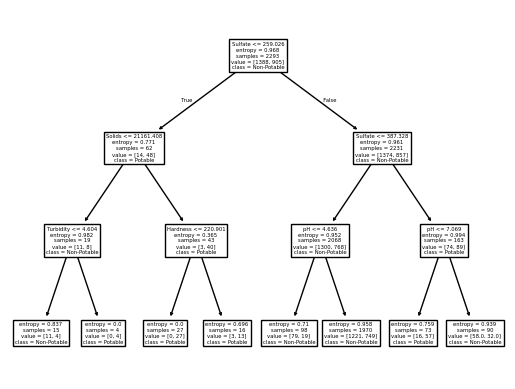

In [90]:
feature_names = ['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
plot_tree(best_tree_3,feature_names = feature_names, class_names=['Non-Potable', 'Potable'])
plt.show()

Το δέντρο συμπέρανε ότι το χαρακτηριστικό που προσφέρει το μεγαλύτερο information gain για τον πρώτο διαχωρισμό είναι το Sulfate. Συγκεκριμένα, εξετάζει ποιά δείγματα έχουν Sulfate<=259 ppm. Το συγκεκριμένο όριο συνάδει με τα προτεινόμενα όρια της Ε.Ε για το πόσιμο νερό, οπότε ο διαχωρισμός αυτός έχει βάση. Για τα δείγματα που αυτό ισχύει, επιλέγει τα Solids ως καταλληλότερο χαρακτηριστικό. Στην συνέχεια, σε χαμηλά επίπεδα solids επιλέγει το pH και για υψηλά το Hardness. Τα δείγματα με υψηλά επίπεδα Sulfates, διαχωρίζονται ξανά με βάση το ίδιο χαρακτηριστικό. Το γεγονός αυτό ίσως να συμφωνεί με την πραγματικότητα, καθώς φαίνεται ότι πράγματι υπάρχουν δύο όρια για το Sulfate. Ένα για χαμηλό όριο που κρίνει ότι το νερό είναι πόσιμο και ένα υψηλότερο όριο, κάτω από το οποίο το νερό είναι μεν πόσιμο, αλλά με αλλοιωμένη γεύση. Στην συνέχεια, και στους δύο κόμβους που ακολουθούν, επιλέγεται το pH ως καταλληλότερο χαρακτηριστικό.

Επιπλέον, παρατηρούμε ότι κάποιοι κόμβοι εν τέλει διαχωρίζουν μεν τα δείγματα, αλλά τα εντάσσουν στην ίδια κλάση. Για παράδειγμα, ο κόμβος με το χαρακτηριστικό Hardness καταλήγει σε δύο σύνολα που και τα δύο ανήκουν στην κλάση 'Potable'. Αυτό μπορεί να συμβαίνει γιατί και τα δύο σύνολα περιέχουν κατά πλειοψηφία Potable δείγματα, αλλά σε διαφορετικά ποσοστά και έτσι το μοντέλο κρίνει ότι και τα δύο πρέπει να θεωρηθούν Potable.

## Ερώτημα 9

Εύρεση καλύτερου δέντρου απόφασης και επανεκπαίδευση

In [91]:
best_comb = combinations[combinations['test_acc']==combinations['test_acc'].max()]
best_comb

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,cost_complexity_pruning,test_acc,train_acc
84,entropy,5.0,2,2,None,0.0,65.62,67.12


In [92]:
best_tree = DecisionTreeClassifier(criterion = best_comb['criterion'].values[0],
                                     max_depth = int(best_comb['max_depth'].values[0]),
                                     min_samples_split=best_comb['min_samples_split'].values[0],
                                     min_samples_leaf=best_comb['min_samples_leaf'].values[0],
                                     max_features=best_comb['max_features'].values[0],
                                     ccp_alpha=best_comb['cost_complexity_pruning'].values[0])

best_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), criterion='entropy',
                       max_depth=5, min_samples_leaf=np.int64(2),
                       min_samples_split=np.int64(2))

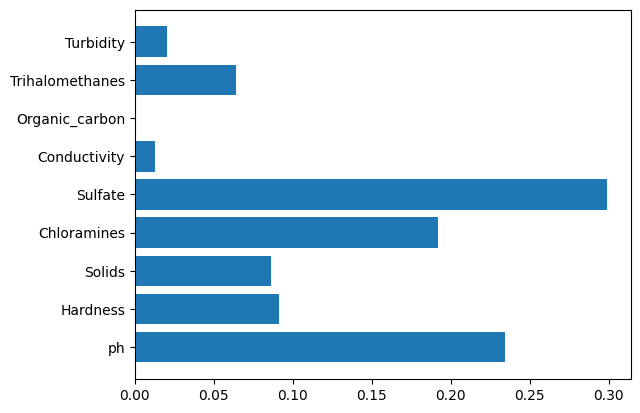

In [93]:
importances = best_tree.feature_importances_
plt.barh(input_df.columns,importances)
plt.show()

Από το ραβδόγραμμα βλέπουμε ότι τα 5 σημαντικότερα χαρακτηριστικά κατά φθίνουσα σειρά, σύμφωνα με το μοντέλο είναι τα: Sulfate, pH,Chloramines, Hardness και Solids. Επομένως, μια συσκευή για χημικές αναλύσεις θα έπρεπε να περιλαμβάνει test για τα συγκεκριμένα μεγέθη.

## Ερώτηση 10

Ένας αλγόριθμος τυχαίου δάσους θα πετύχαινε καλύτερη ακρίβεια, καθώς αποτελείται από πολλά δέντρα τα οποία εκπαιδεύονται σε διαφορετικά σετ δεδομένων. Έτσι, το μοντέλο είναι αμερόληπτο και συμψηφίζει τα συμπεράσματα των επιμέρους δέντρων για να εξάγει το καλύτερο τελικό αποτέλεσμα.

## Ερώτημα 11

In [94]:
n_estimators_ = [50, 100, 200]
criterion_ = ['gini', 'entropy']
max_depth_ = [None, 3, 5]
min_samples_split_ = [2, 5]
min_samples_leaf_ = [1, 2]
max_features_ = [None, 'sqrt']
cost_complexity_pruning_ = [0, 0.01]

variables = []
for n_estimators in n_estimators_:
  for criterion in criterion_:
    for max_depth in max_depth_:
      for min_samples_split in min_samples_split_:
        for min_samples_leaf in min_samples_leaf_:
          for max_features in max_features_:
            for cost_complexity_pruning in cost_complexity_pruning_:

                forest = RandomForestClassifier(n_estimators = n_estimators, criterion=criterion, max_depth= max_depth,
                                              min_samples_split=min_samples_split,
                                              min_samples_leaf=min_samples_leaf,
                                              max_features=max_features, random_state = seed,
                                              ccp_alpha=cost_complexity_pruning)

                forest.fit(x_train, y_train)

                y_pred_test = forest.predict(x_test)
                y_pred_train = forest.predict(x_train)

                accuracy_test = accuracy_score(y_test, y_pred_test)
                accuracy_percentage_test = round(accuracy_test*100, 2)


                accuracy_train = accuracy_score(y_train, y_pred_train)
                accuracy_percentage_train = round(accuracy_train*100, 2)

                variables.append([n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf,
                            max_features, cost_complexity_pruning, accuracy_percentage_test,  accuracy_percentage_train])

cols = ['n_estimators', 'criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf',
         'max_features', 'cost_complexity_pruning', 'test_acc', 'train_acc']

combinations = pd.DataFrame(variables, columns= cols)
combinations['max_depth'] = combinations['max_depth'].fillna('None')
combinations

,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,cost_complexity_pruning,test_acc,train_acc
0,50,gini,None,2,1,None,0.00,67.24,100.00
1,50,gini,None,2,1,None,0.01,62.67,61.97
2,50,gini,None,2,1,sqrt,0.00,69.38,100.00
3,50,gini,None,2,1,sqrt,0.01,62.05,60.53
4,50,gini,None,2,2,None,0.00,66.94,99.78
...,...,...,...,...,...,...,...,...,...
283,200,entropy,5.0,5,1,sqrt,0.01,62.87,62.45
284,200,entropy,5.0,5,2,None,0.00,66.02,69.52
285,200,entropy,5.0,5,2,None,0.01,64.70,64.68
286,200,entropy,5.0,5,2,sqrt,0.00,64.80,68.29


In [95]:
best_comb = combinations[combinations['test_acc']==combinations['test_acc'].max()]
best_comb

,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,cost_complexity_pruning,test_acc,train_acc
98,100,gini,None,2,1,sqrt,0.0,69.79,100.0


Από το παραπάνω βλέπουμε ότι το καλύτερο τυχαίο δάσος αποτελείται από 100 επιμέρους δέντρα. Επιπλέον, η ακρίβεια σε σχέση με το καλύτερο δέντρο απόφασης αυξάνεται κατά περίπου 5%.

## Ερώτημα 12

Είναι καλύτερο για το μοντέλο να προβλέπει με ακρίβεια το μη πόσιμο νερό σε σχέση με το πόσιμο, αφού σε περίπτωση που προβλέψει ότι μια πηγή με μη πόσιμο νερό είναι πόσιμη, τότε τίθεται σε κίνδυνο η υγεία των καταναλωτών. Από την άλλη, το να θεωρηθεί μία πηγή πόσιμου νερού μη πόσιμη μπορεί για παράδειγμα να προκαλέσει προβλήματα διαθεσιμότητας, αλλά δεν θέτει σε άμεσο κίνδυνο την ανθρώπινη υγεία.

## Ερώτημα 13

Γενικά, από νομικής άποψης, θα επιλέγαμε ένα Random Forest έναντι ενός Decision Tree, γιατί κατά κανόνα τα random forests έχουν μεγαλύτερη ακρίβεια και άρα υπάρχει μικρότερη πιθανότητα η εταιρεία να έχει νομικές επιπτώσεις. Ωστόσο, για το συγκεκριμένο παράδειγμα, το random forest δεν έχει τόσο σημαντικά μεγαλύτερη ακρίβεια από το decision tree, και ανέρχεται στο 70%, που σημαίνει ότι είναι βέβαιο ότι ο αλγόριθμος θα οδηγήσει σε σφάλματα. Επομένως, θεωρώντας ότι το μοντέλο δεν θα λάβει περαιτέρω βελτιώσεις, ίσως να μην αξίζει να θυσιάσουμε την επεξηγησιμότητα του μοντέλου για τόσο μικρή αύξηση στην ακρίβεια. Εφόσον είναι σίγουρο ότι θα προκύψουν σφάλματα, θα πρέπει τουλάχιστον η εταιρεία να μπορεί να εξηγήσει τι έγινε λάθος στο μοντέλο ώστε να μπορεί να το αποτρέψει στο μέλλον.